# Working with Gridded netCDF data and xarray - Continued 

**This lesson is based on the [_Lesson: working with netCDF data_](https://fabienmaussion.info/climate_system/week_02/01_Lesson_NetCDF_Data.html) in [Fabien Maussion](https://fabienmaussion.info/)'s Physics of the Climate System Course.** 

_These lecture notes and exercises are licensed under a [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license._ 

Following up on the first part of this lesson, we will now do some additional data analysis using the [CERES](https://climatedataguide.ucar.edu/climate-data/ceres-ebaf-clouds-and-earths-radiant-energy-systems-ceres-energy-balanced-and-filled) (Clouds and the Earth's Radiant Energy System) mission.

## Background

The Earth's Energy Balance is approximately balanced. This means we have roughly the same amount of energy coming in from the sun that is leaving as longwave radiation to space. 

If this weren't the case, the Earth would be warming. Ok, we know it is warming, but this is due to a pretty small imbalance. 

The Global Energy Budget can be visualized as follows [[Treberth & Fasullo, 2012](https://link.springer.com/article/10.1007/s10712-011-9150-2)]:

![Global Energy Budget](../assets/GlobalEnergyBudget.png)

The data we will be working with is a globall gapfilled and quality controlled data product that contains Top of Atmosphere and Surface Components of the Radiative Balance, which is a key component of Earth's Energy Balance. 

## NetCDF Files

In order to open and plot NetCDF files, you'll need to install the `xarray`, `cartopy`, and `netcdf4` packages: if you haven't done so already, follow the [installation instructions](https://isat-drg.github.io/ISAT_420/EnvironmentalData/4_Environments/condaEnvs.html) for our ISAT420 python environment that contains these packages. 

As a quick fix, you can also install them directly using the code below (this will take some time). 

In [6]:
#To install these packages remove the hash (#) characters in the lines below and run the cell. The ! tells jupyter to run a system command. 
#! conda install xarray
#! conda install netcdf4
#! conda install cartopy 

### Imports and options

First, let's import the tools we need. Remember why we need to import our tools? If not, ask Fabien! 

In [7]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

### The data 

The data we are going to use today is from the [CERES](https://climatedataguide.ucar.edu/climate-data/ceres-ebaf-clouds-and-earths-radiant-energy-systems-ceres-energy-balanced-and-filled) (Clouds and the Earth's Radiant Energy System) mission. We are going to use the EBAF-TOA and the EBAF-Surface data products (both freely available [on this webpage](https://ceres.larc.nasa.gov/data/)) as climatologies (i.e. monthly averages 2005-2015). 

The data quality summary of these data (PDF) can be found [here](https://ceres.larc.nasa.gov/documents/DQ_summaries/CERES_EBAF_Ed4.1_DQS.pdf), and more accessible publications can be found [here for TOA](https://journals.ametsoc.org/doi/pdf/10.1175/JCLI-D-17-0208.1) and [here for Surface](https://journals.ametsoc.org/doi/pdf/10.1175/JCLI-D-17-0523.1).

**You can download the files** [here for TOA](https://cluster.klima.uni-bremen.de/~fmaussion/teaching/climate/CERES_EBAF-TOA_Ed4.1_Clim-2005-2015.nc),  [here for Surface](https://cluster.klima.uni-bremen.de/~fmaussion/teaching/climate/CERES_EBAF-Surface_Ed4.1_Clim-2005-2015.nc).

### Read the data

Most of today's meteorological data is stored in the NetCDF format (``*.nc``). NetCDF files are binary files, which means that you can't just open them in a text editor. You need a special reader for it. Nearly all the programming languages offer an interface to NetCDF. For this course we are going to use the [xarray](http://xarray.pydata.org/en/stable/) library to read the data:

In [8]:
# Here I downloaded the file in the "data" folder which I placed in a folder close to this notebook
# The variable name "ds" stands for "dataset"
ds = xr.open_dataset(r'../data/CERES_EBAF-TOA_Ed4.1_Clim-2005-2015.nc')

In [9]:
# Let's see what we have
ds

<xarray.Dataset> Size: 16MB
Dimensions:            (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon                (lon) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * month              (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    toa_sw_all_clim    (month, lat, lon) float32 3MB ...
    toa_lw_all_clim    (month, lat, lon) float32 3MB ...
    toa_sw_clr_c_clim  (month, lat, lon) float32 3MB ...
    toa_lw_clr_c_clim  (month, lat, lon) float32 3MB ...
    solar_clim         (month, lat, lon) float32 3MB ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

The NetCDF dataset is constituted of various elements: Dimensions, Coordinates, Variables, Attributes:
- the dimensions specify the number of elements of each data coordinate, their names should be understandable and specific
- the attributes provide some information about the file (metadata)
- the variables contain the actual data. In our file there are five variables. All have the dimensions [month, lat, lon], so we can expect an array of size [12, 180, 360]
- the coordinates locate the data in space and time

*Note: you can disable the "fancy output" and replace it by old-fashioned text with the setting: `xr.set_options(display_style="text")`*

### Coordinates 

Similar to the ERA5 data, we have 3 coordinates. `month`, `lat`, `lon`, which are self explanatory. 

In [10]:
ds.month

<xarray.DataArray 'month' (month: 12)> Size: 48B
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)
Coordinates:
  * month    (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Climatological Monthly Means Based on 07/2005 to 06/2015
    standard_name:  climatology time
    climatology:    climatology_bounds
    units:          months of a climatology year
    delta_t:        0000-01-00 00:00:00

The array contains numbers from 1 to 12, they represent the months of the year. From the attribute "title", we know that these represent the average for each month for the period 07/2005 - 06/2015.

The **location coordinates** are also self-explaining:

In [11]:
ds.lon

<xarray.DataArray 'lon' (lon: 360)> Size: 1kB
array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:      Longitude
    standard_name:  longitude
    units:          degrees_east
    valid_range:    [-180.  360.]

In [12]:
ds.lat

<xarray.DataArray 'lat' (lat: 180)> Size: 720B
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_range:    [-90.  90.]

**Q: what is the spatial resolution of CERES data?**

In [ ]:
# CERES stands for "Clouds and the Earth's Radiant Energy System" this data is the amount 
# it contains 3 coordinates, month, latitude, and longitude which are self explanatory. the numbers in the array 1-12 are the months of the year.

#radiation fluxes at teh top of the atmosphere (TOA) - it takes the whole earth and puts a grid over the earth- we can see in latitude and longitude how things 
#relate to eachother spacially, the spacial resolution is by 1 degree 1 by 1 longitude is spaced out 1 degree.
# how tightly our grid is spaced is 1 by 1

### Variables 

Variables can also be accessed directly from the dataset:

In [13]:
ds.toa_sw_all_clim

<xarray.DataArray 'toa_sw_all_clim' (month: 12, lat: 180, lon: 360)> Size: 3MB
[777600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Top of The Atmosphere Shortwave Flux, All-Sky conditions,...
    standard_name:  TOA Shortwave Flux - All-Sky
    CF_name:        toa_outgoing_shortwave_flux
    comment:        none
    units:          W m-2
    valid_min:            0.00000
    valid_max:            600.000

The **attributes** of a variable are extremely important, they carry the *metadata* and must be specified by the data provider. Here we can read in which units the variable is defined, as well as a description of the variable (the "long_name" attribute).

**Q: what other information can we read from this printout? Explore the other data variables and see if you understand all of them.** *Note: you can expand each variable's attributes in the html display, or use the method `ds.info()` to list all vars and attributes.*

In [14]:
# the attributes are:
#   title = CERES EBAF (Energy Balanced and Filled) TOA Fluxes
#   Monthly Averages and 07/2005 to 06/2015 Climatology
#	institution = NASA/Langley Research Center in Hampton Va 
#	Conventions = CF-1.4 
#	comment = Climatology from 07/2005 to 06/2015
#	version = Edition 4.1
#	DOI = 10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1 
#i found these by running ds.info()
ds.info()

xarray.Dataset {
dimensions:
	lon = 360 ;
	lat = 180 ;
	month = 12 ;

variables:
	float32 lon(lon) ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:valid_range = [-180.  360.] ;
	float32 lat(lat) ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
		lat:valid_range = [-90.  90.] ;
	int32 month(month) ;
		month:long_name = Climatological Monthly Means Based on 07/2005 to 06/2015 ;
		month:standard_name = climatology time ;
		month:climatology = climatology_bounds ;
		month:units = months of a climatology year ;
		month:delta_t = 0000-01-00 00:00:00 ;
	float32 toa_sw_all_clim(month, lat, lon) ;
		toa_sw_all_clim:long_name = Top of The Atmosphere Shortwave Flux, All-Sky conditions, Climatological Means based on 7/2005 to 6/2015 ;
		toa_sw_all_clim:standard_name = TOA Shortwave Flux - All-Sky ;
		toa_sw_all_clim:CF_name = toa_outgoing_shortwave_flux ;
		toa_sw_all_clim:comment = none ;
		toa_sw_al

## Our Analysis

First lets average again over the month.

In [15]:
sw_avg = ds.toa_sw_all_clim.mean(dim='month')

### 2d data

We are now going to plot the average Top of The Atmosphere Shortwave Flux on a map:

/Users/kaylynberg/anaconda3/envs/ISAT420/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


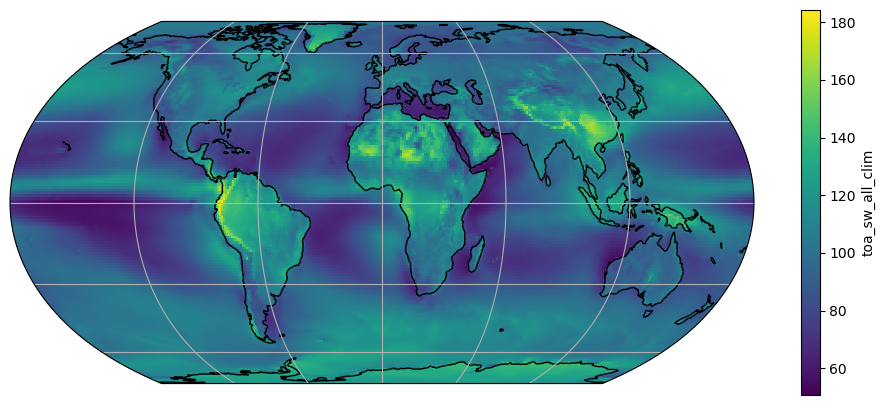

In [16]:
# Define the map projection (how does the map look like)
ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
sw_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

We are looking at the average TOA outgoing shorwage flux, expressed in W m$^{-2}$. Such time averages are often writen with a bar on top of them:

$\overline{SW_{TOA}} = temporal\_mean(SW_{TOA})$

**Q: look at the basic features of the plot. Can you explain most of the patterns that you observe? Where are the highest values? The lowest ones?**

### 1d data

It is equally easy to plot 1d data. In this case, we are going to compute the zonal average of ``sw_avg``. "Zonal average" means "along a latitude circle". It is often writen with ``[]`` or ``<>`` in formulas:

$\left[ \overline{SW_{TOA}} \right] = zonal\_mean(temporal\_mean(SW_{TOA}))$

Note that the two operators are commutative, i.e.:

$\left[ \overline{SW_{TOA}} \right] = \overline{\left[ SW_{TOA} \right]}$

Let's compute it and plot it right away:

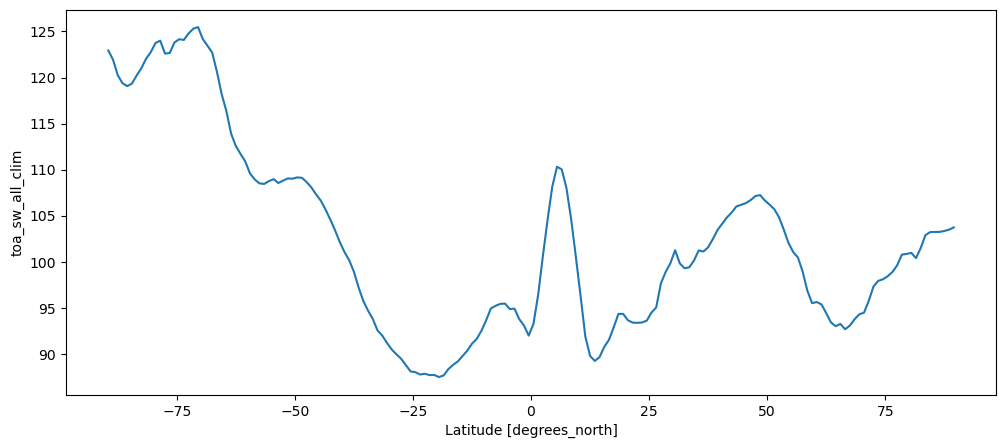

In [17]:
sw_avg.mean(dim='lon').plot();

**Q: look at the basic features of the plot. Can you recognize the important features from the map above?**

## More data manipulation with xarray 

As you have probably noted already, xarray's objects (called Dataset for the whole netCDF file or DataArray for single variables) are quite powerful, and can do more than much arrays know from other languages. Last week we talked about the differences between python's lists and numpy's arrays. Today we introduced this new object (DataArray) which is one level higher in usability.

But don't worry if this sounds confusing at first! From now on we are going to use DataArrays only. The best thing about them is that they carry their dimension names and coordinates with them. This is the reason why it was so easy to make a plot with the right axis labels in just one command. They have very useful other properties, and we will learn these step by step.

One of the first nice properties is that they behave just like regular arrays. That is, you can do arithmetic with them. Our first task will be to compute the net energy balance at the top of the atmosphere:

$$\overline{EB_{TOA}} = \overline{SW_{In}} - \overline{SW_{TOA}} - \overline{LW_{TOA}} \approx 0$$

### Arithmetics and averages on a sphere

<xarray.DataArray (lat: 180, lon: 360)> Size: 259kB
array([[ -91.28867 ,  -91.28867 ,  -91.28867 , ...,  -91.28867 ,
         -91.28867 ,  -91.28867 ],
       [ -91.45623 ,  -91.45623 ,  -91.45623 , ...,  -91.45623 ,
         -91.45623 ,  -91.45623 ],
       [ -91.79624 ,  -91.79624 ,  -91.79624 , ...,  -91.79624 ,
         -91.79624 ,  -91.79624 ],
       ...,
       [-126.24874 , -126.24874 , -126.24874 , ..., -126.24874 ,
        -126.24874 , -126.24874 ],
       [-126.338905, -126.338905, -126.338905, ..., -126.338905,
        -126.338905, -126.338905],
       [-126.56    , -126.56    , -126.56    , ..., -126.56    ,
        -126.56    , -126.56    ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5


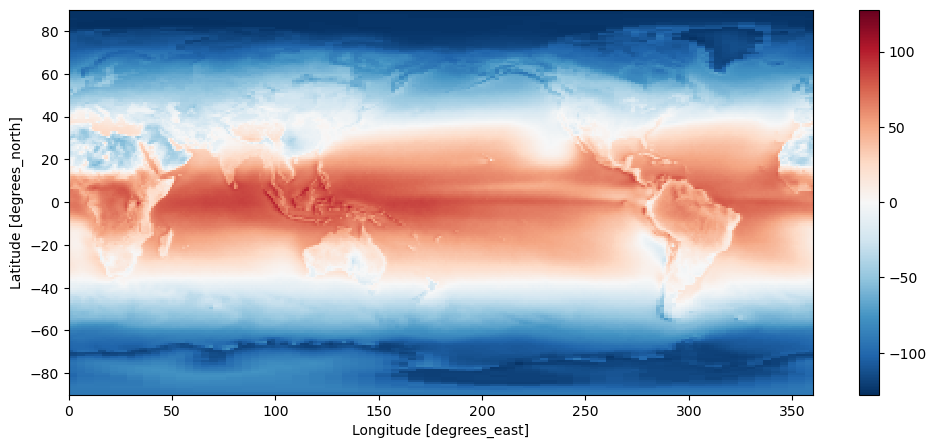

In [36]:
# Note that there are many different ways to get to the same result. For the sake of clarity we use the simple way:
eb_avg = ds.solar_clim.mean(dim='month') - ds.toa_sw_all_clim.mean(dim='month') - ds.toa_lw_all_clim.mean(dim='month')
print(eb_avg)
eb_avg.plot()

**E: plot eb_avg on a map. Why did xarray use another colormap? Describe the basic features of the plot. Where is the climate system gaining energy? Losing energy?** 

In [19]:
# your answer here above i plotted eb_avg by printnting the variable and then plottign it under
# the basic features of the plot are that its another colormap, theres an axis label of latitude and longitude both in degrees.
# It seems the tropics get more sun and its closer to the center of the heat map- lose energy at the poles and all
#the energy goes to the center(Tropics)

#we are gettign more eneergy than which is leavign which leads to global warming but based on what we see the data would show us the earths
#temperature is actually cooling
# theres a problem because the grid is flat and the globe is round 

We said that the energy balance should be close to zero (balanced). Fortunately, it is easy to check:

In [20]:
eb_avg.mean().item()

-28.665794372558594

But, wait? This is quite far from zero!!! What's going on here?

Well, it's simpler than it seems. This is an anoying problem with our planet: it happens to be a sphere. (Or something close to a sphere).

So when we average without taking this into account, we get wrong results. How wrong is it? A regular plot of the data will help us to see what happens here:

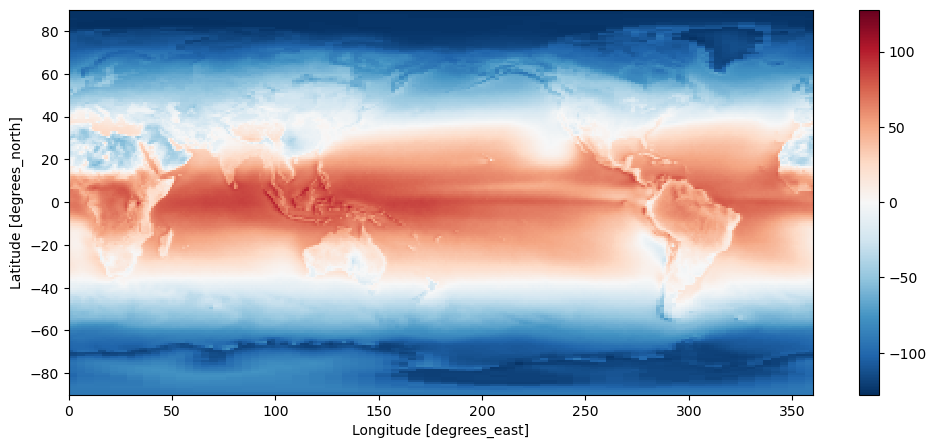

In [21]:
eb_avg.plot();

Which has to be compared to a sphere. When averaging [lon, lat] data, one gives too much weight to high latitudes.

Fortunately, this can be solved by noting that we have to weight each latitudinal band by the cosinus of the latitude, i.e. $\cos \varphi$. We are going to compute a new average, but [weighted](https://en.wikipedia.org/wiki/Weighted_arithmetic_mean) this time. First, let's make a weight array:

In [22]:
weight = np.cos(np.deg2rad(ds.lat))
weight = weight / weight.sum()

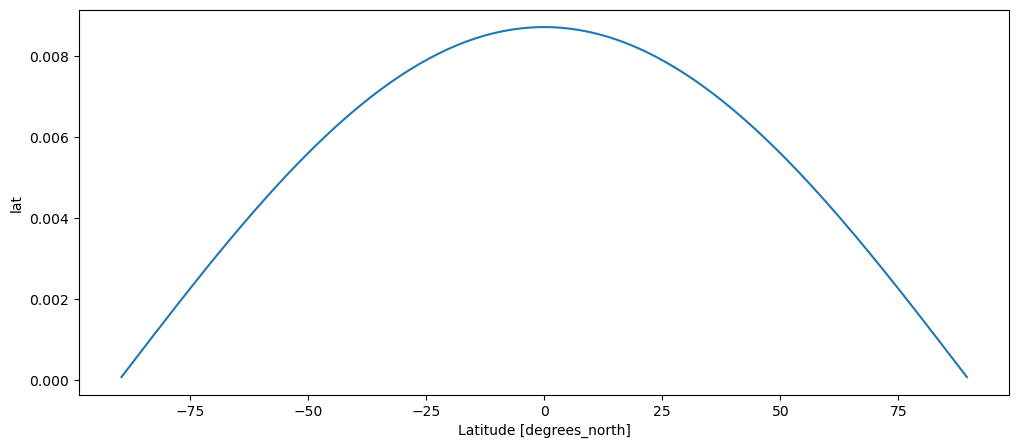

In [23]:
weight.plot();

**Q: can you follow each step? If not, redo each step one by one, and use the ? to get help about each of these functions!**

In [24]:
# your answer here

Weight is an array of 180 elements, which is normalised so that it's sum is 1. This is exactly what we need to compute a weighted average! First, we have to average over the longitudes (this is fine, because along a latitude circle all points have the same weight), and then compute the weighted average.

In [25]:
zonal_eb_avg = eb_avg.mean(dim='lon')  # important! Always average over longitudes first
# this averaging is needed so that the arithmetic below makes sense 
# (multiply two arrays of 180 elements together)
weighted_eb_avg = np.sum(zonal_eb_avg * weight)
weighted_eb_avg.item()

0.9690554141998291

Aaaah, this looks much better now. Not exactly zero, but much closer. 

**Note**: the remaining value (called the residual) is a combination of measurement errors, geometrical approximations (the Earth is not a perfect sphere, see e.g. [this post](https://towardsdatascience.com/the-correct-way-to-average-the-globe-92ceecd172b7) for a more correct implementation which yields ~1.07 instead of 0.97), and anthropogenic energy imbalance (refs [1](https://www.nature.com/articles/nclimate3043), [2](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021GL093047)).

### Data selection and multiline plots

We have seen that DataArrays can be averaged along one dimension as follows:

In [26]:
eb_lon_avg = ds.solar_clim.mean(dim='lon')
eb_lon_avg

<xarray.DataArray 'solar_clim' (month: 12, lat: 180)> Size: 9kB
array([[495.7     , 495.60004 , 495.2822  , ...,   0.      ,   0.      ,
          0.      ],
       [306.      , 305.89996 , 305.69998 , ...,   0.      ,   0.      ,
          0.      ],
       [ 59.189995,  60.143776,  62.062664, ...,  22.60511 ,  20.660666,
         19.69    ],
       ...,
       [212.1     , 212.      , 211.9     , ...,   0.      ,   0.      ,
          0.      ],
       [440.7     , 440.5     , 440.28442 , ...,   0.      ,   0.      ,
          0.      ],
       [549.10004 , 549.      , 548.6267  , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12

The resulting array has dimensions (month, lat). A common thing we like to do is for example select certain months, this is an easy task with xarray and the method ``.sel()``:

In [27]:
avg_jan = eb_lon_avg.sel(month=1)

**E: plot avg_jan to make sure that it is indeed what you think it is.**

In [28]:
# your answer here

With the help of a few commands, it is not a big deal to make a nice looking plot:

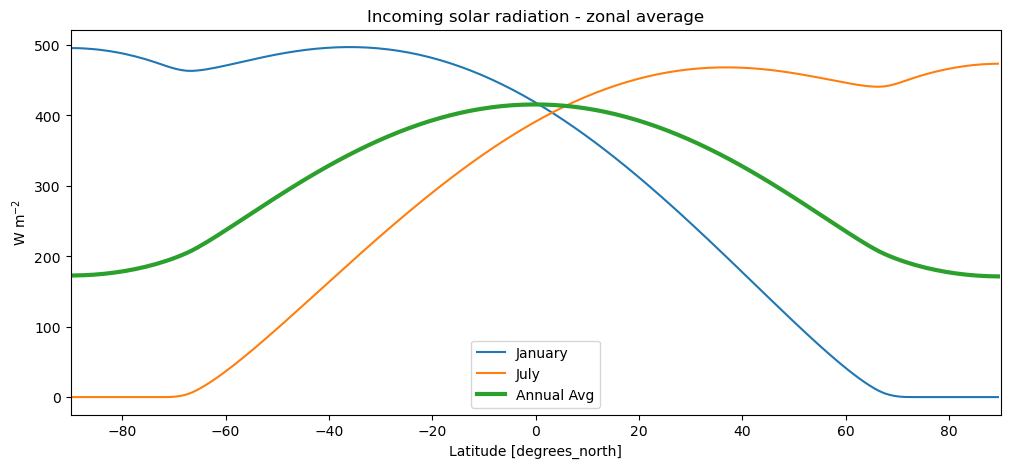

In [29]:
eb_lon_avg.sel(month=1).plot(label='January')
eb_lon_avg.sel(month=7).plot(label='July')
eb_lon_avg.mean(dim='month').plot(label='Annual Avg', linewidth=3)
plt.xlim(-90, 90)
plt.title('Incoming solar radiation - zonal average')
plt.legend(loc='best')
plt.ylabel('W m$^{-2}$');